In [110]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_histogram,
    theme_bw,
    labs,
    geom_point,
    scale_color_brewer,
)
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [101]:
df = pd.read_csv("../data/full_data.csv", index_col="SEQN")

column_map = {
    "INDFMMPI": "poverty_num",
    "INDFMMPC": "poverty_cat",
    "PAQ605": "activity_vig_work_min",
    "PAQ620": "activity_mod_work_min",
    "PAQ635": "activity_walk_or_use_bike",
    "PAD645": "activity_minutes_walk_bike",
    "PAD660": "activity_vig",
    "PAD675": "activity_mod",
    "PAD680": "activity_sed",
    "DSQTCAFF": "caffeine_sup_mg",
    "DR1ICAFF": "caffeine_intake1_mg",
    "DR2ICAFF": "caffeine_intake2_mg",
    "DR1TCAFF": "caffeine_nutrient1_mg",
    "DR2TCAFF": "caffeine_nutrient2_mg",
    "BMXBMI": "bmi_total",
    "BMXWAIST": "bmi_waist",
    "ALQ130": "alcohol_nmbr_drinks",
    "OCQ180": "new_name",
    "OCQ670": "new_name",
    "DIQ010": "diabetes_diag",
    "DIQ050": "diabetes_insulin",
    "DIQ280": "diabetes_aic",
    "SMQ020": "smoking_100cigs",
    "SMD650": "smoking_cigs_pd",
    "KIQ026": "kidney_had_stones",
    "KIQ029": "kidney_passed_stone",
    "KIQ022": "kidney_weak_failing",
    "RIAGENDR": "demo_gender",
    "RIDRETH3": "demo_race",
    "RIDAGEYR": "demo_age",
}

df = df.rename(column_map, axis=1)
df["kidney_had_stones"] = 0 or df["kidney_had_stones"] == 1
df.head()

,poverty_num,poverty_cat,activity_vig_work_min,activity_mod_work_min,activity_walk_or_use_bike,activity_minutes_walk_bike,activity_vig,activity_mod,activity_sed,caffeine_sup_mg,...,smoking_100cigs,smoking_cigs_pd,caffeine_nutrient1_mg,kidney_had_stones,kidney_passed_stone,kidney_weak_failing,demo_gender,demo_race,demo_age,caffeine_nutrient2_mg
SEQN,,,,,,,,,,,,,,,,,,,,,
109263,3.26,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.00,False,NaN,NaN,1.00,6.00,2.00,3.00
109264,1.29,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.00,False,NaN,NaN,2.00,1.00,13.00,0.00
109265,2.04,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.00,False,NaN,NaN,1.00,3.00,2.00,2.00
109266,5.00,3.00,2.00,2.00,2.00,NaN,60.00,30.00,480.00,NaN,...,2.00,NaN,12.00,False,NaN,2.00,2.00,6.00,29.00,38.00
109267,5.00,3.00,2.00,2.00,2.00,NaN,90.00,NaN,540.00,NaN,...,2.00,NaN,NaN,False,NaN,2.00,2.00,2.00,21.00,NaN


In [102]:
df[
    [
        "caffeine_sup_mg",
        "caffeine_intake1_mg",
        "caffeine_intake2_mg",
        "caffeine_nutrient1_mg",
        "caffeine_nutrient2_mg",
    ]
].round(2).describe()

,caffeine_sup_mg,caffeine_intake1_mg,caffeine_intake2_mg,caffeine_nutrient1_mg,caffeine_nutrient2_mg
count,32.00,0.00,0.00,12392.00,10627.00
mean,156.00,NaN,NaN,95.57,83.95
std,220.69,NaN,NaN,174.82,150.42
min,2.00,NaN,NaN,0.00,0.00
25%,52.25,NaN,NaN,0.00,0.00
50%,98.50,NaN,NaN,31.00,21.00
75%,169.75,NaN,NaN,137.00,120.00
max,1200.00,NaN,NaN,4320.00,5040.00


In [103]:
df["any_caffeine"] = df[
    [
        "caffeine_sup_mg",
        "caffeine_intake1_mg",
        "caffeine_intake2_mg",
        "caffeine_nutrient1_mg",
        "caffeine_nutrient2_mg",
    ]
].max(axis=1)
df["any_caffeine_log"] = np.log1p(df["any_caffeine"])
df["any_caffeine"].describe().apply("{0:.0f}".format)

count    12414
mean       115
std        191
min          0
25%          3
50%         50
75%        161
max       5040
Name: any_caffeine, dtype: object

In [104]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

caffeine_intake1_mg          1.00
caffeine_intake2_mg          1.00
caffeine_sup_mg              1.00
kidney_passed_stone          0.94
diabetes_aic                 0.92
diabetes_insulin             0.91
smoking_cigs_pd              0.89
activity_minutes_walk_bike   0.86
activity_vig                 0.84
activity_mod                 0.75
new_name                     0.65
new_name                     0.64
alcohol_nmbr_drinks          0.62
kidney_weak_failing          0.41
activity_sed                 0.38
activity_walk_or_use_bike    0.38
smoking_100cigs              0.38
activity_mod_work_min        0.38
activity_vig_work_min        0.38
caffeine_nutrient2_mg        0.32
poverty_num                  0.21
caffeine_nutrient1_mg        0.20
any_caffeine                 0.20
any_caffeine_log             0.20
bmi_waist                    0.19
bmi_total                    0.16
poverty_cat                  0.08
diabetes_diag                0.04
kidney_had_stones            0.00
demo_gender   

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 3146 rows containing non-finite values.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x1082bd940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


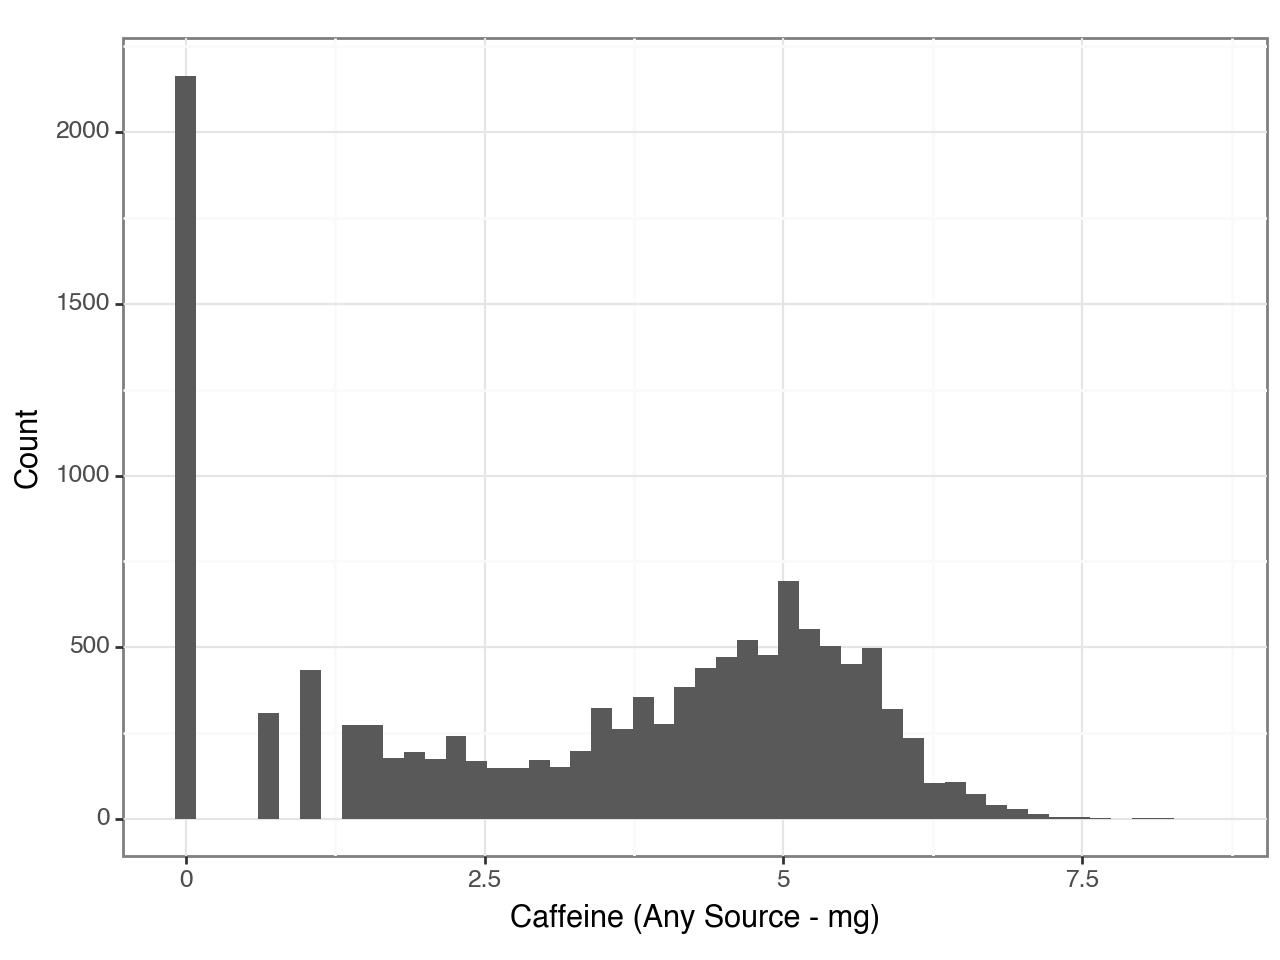

<Figure Size: (640 x 480)>

In [105]:
(
    ggplot(data=df, mapping=aes(x="any_caffeine_log"))
    + geom_histogram(bins=50)
    + theme_bw()
    + labs(y="Count", x="Caffeine (Any Source - mg)")
)

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3146 rows containing missing values.


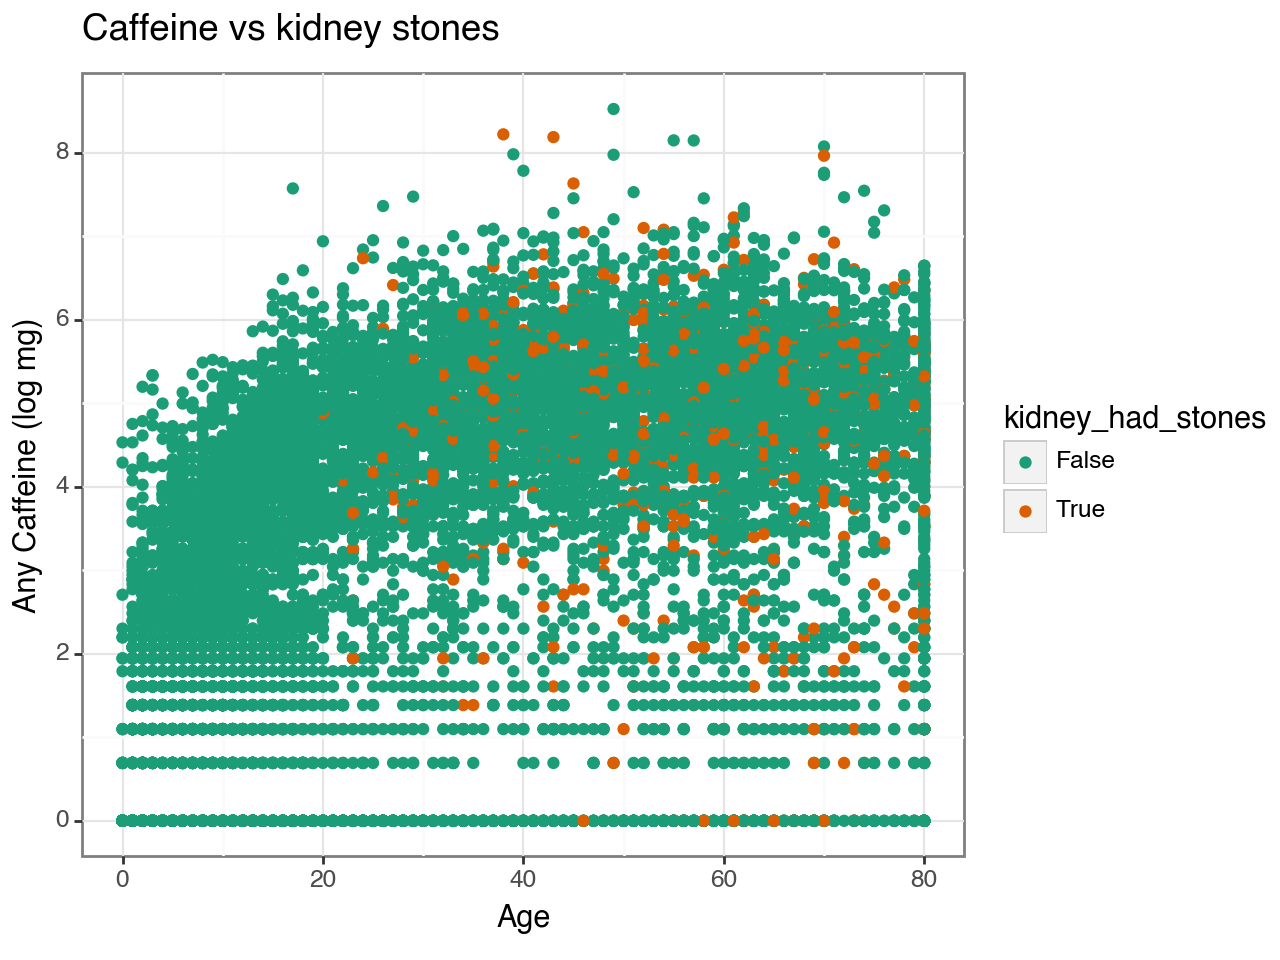

<Figure Size: (640 x 480)>

In [111]:
# (
#     ggplot(
#         data=df,
#         mapping=aes(x="demo_age", y="any_caffeine_log", color="kidney_had_stones"),
#     )
#     + geom_point()
#     + theme_bw()
#     + labs(y="Any Caffeine (log mg)", x="Age", title="Caffeine vs kidney stones")
#     + scale_color_brewer(palette="Dark2", type="qual")
# )